In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import os

In [2]:
data = pd.read_csv('MSF_1996_2023.csv')
data.dropna(inplace=True)
data

/var/folders/_m/1_9st6953jb89bcn92vcqxph0000gn/T/ipykernel_1106/3013689114.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('MSF_1996_2023.csv')


,PERMNO,date,SHRCD,SICCD,TICKER,COMNAM,PERMCO,CUSIP,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,RETX,vwretd
0,10001,1996-01-31,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.75000,9.50000,-9.12500,168.0,-0.026667,8.75000,9.50000,2281.0,-0.026667,0.028121
1,10001,1996-02-29,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.75000,9.50000,9.25000,524.0,0.013699,9.25000,9.75000,2281.0,0.013699,0.016353
2,10001,1996-03-29,11,4920,EWST,ENERGY WEST INC,7953,36720410,9.25000,9.75000,9.48438,283.0,0.036149,9.00000,9.50000,2309.0,0.025338,0.010914
3,10001,1996-04-30,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.62500,9.37500,-8.81250,327.0,-0.070840,8.62500,9.00000,2309.0,-0.070840,0.025560
4,10001,1996-05-31,11,4920,EWST,ENERGY WEST INC,7953,36720410,8.62500,9.00000,8.62500,103.0,-0.021277,8.62500,9.00000,2309.0,-0.021277,0.026810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636558,93436,2023-08-31,11,9999,TSLA,TESLA INC,53453,88160R10,215.49001,261.07001,258.07999,25029170.0,-0.034962,258.07001,258.09000,3173994.0,-0.034962,-0.020605
1636559,93436,2023-09-29,11,9999,TSLA,TESLA INC,53453,88160R10,240.50000,276.04001,250.22000,24395440.0,-0.030456,250.23000,250.31000,3179000.0,-0.030456,-0.047390
1636560,93436,2023-10-31,11,9999,TSLA,TESLA INC,53453,88160R10,197.36000,263.62000,200.84000,25905681.0,-0.197346,200.77000,200.89000,3178921.0,-0.197346,-0.028867
1636561,93436,2023-11-30,11,9999,TSLA,TESLA INC,53453,88160R10,205.66000,246.72000,240.08000,26395792.0,0.195379,239.95000,240.10001,3178921.0,0.195379,0.092057


In [8]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [9]:
data.columns

Index(['PERMNO', 'date', 'SHRCD', 'SICCD', 'TICKER', 'COMNAM', 'PERMCO',
       'CUSIP', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT',
       'RETX', 'vwretd', 'year', 'month'],
      dtype='object')

In [11]:
def sample_firms(group):
    firms = group.sample(n=min(len(group), 10), replace=False)
    return firms

data = data.groupby(['SICCD', 'year']).apply(sample_firms).reset_index(drop=True)
data

,PERMNO,date,SHRCD,SICCD,TICKER,COMNAM,PERMCO,CUSIP,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,RETX,vwretd,year,month
0,18676,2019-05-31,11,0,TMDX,TRANSMEDICS GROUP INC,56757,89377M10,22.3600,30.41,27.1900,100620.0,C,26.9200,27.18,21094.0,C,-0.061679,2019,5
1,18676,2020-04-30,11,0,TMDX,TRANSMEDICS GROUP INC,56757,89377M10,11.6600,18.26,18.0900,25365.0,0.497517,17.8300,18.09,21362.0,0.497517,0.129674,2020,4
2,18677,2021-11-30,11,0,TRVI,TREVI THERAPEUTICS INC,56758,89532M10,0.9799,1.23,0.9946,77903.0,-0.153532,0.9946,1.00,25847.0,-0.153532,-0.018350,2021,11
3,18677,2022-05-31,11,0,TRVI,TREVI THERAPEUTICS INC,56758,89532M10,1.9800,2.65,2.4200,31511.0,-0.103704,2.3500,2.42,38686.0,-0.103704,-0.002113,2022,5
4,18573,2022-03-31,11,0,SCPL,SCIPLAY CORP,56716,80908710,11.5800,13.39,12.9200,73826.0,-0.009202,12.8800,12.92,24700.0,-0.009202,0.030506,2022,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,17090,2019-07-31,11,Z,LGC,LEGACY ACQUISITION CORP,56138,70214110,10.1000,10.17,10.1400,4169.0,0.003960,10.1400,10.17,30000.0,0.003960,0.011854,2019,7
18065,17090,2019-06-28,11,Z,LGC,LEGACY ACQUISITION CORP,56138,70214110,10.0600,10.15,10.1000,2995.0,0.002979,10.1000,10.12,30000.0,0.002979,0.067279,2019,6
18066,21927,2022-06-30,11,Z,DWAC,DIGITAL WORLD ACQUISITION CORP,58718,25400Q10,22.5700,44.31,24.1600,229611.0,-0.447266,24.1000,24.18,30027.0,-0.447266,-0.083998,2022,6
18067,21927,2022-01-31,11,Z,DWAC,DIGITAL WORLD ACQUISITION CORP,58718,25400Q10,50.3700,86.31,73.0700,1727000.0,0.420766,73.0000,73.10,30027.0,0.420766,-0.059822,2022,1


In [16]:
print(len(data.PERMNO.unique()))
print(len(data.groupby(['SICCD', 'year'])))

4838
11273


In [17]:
ret = []
for i in data['RET']:
    if i == 'C':
        i=0
    ret.append(float(i))
data['RET']=ret
for i in data['RET']:
    if i == 'C':
        print(i)

In [18]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

sampled_data = data

def estimate_beta(data, months):
    betas = []

    for permno in data['PERMNO'].unique():
        firm_data = data[data['PERMNO'] == permno].sort_values('date')

        for year in range(1996, 2024):
            period_data = firm_data[(firm_data['year'] <= year) & 
                                    (firm_data['year'] >= year - (months // 12))]

            if len(period_data) >= months:
                X = period_data[['vwretd']].values
                y = period_data['RET'].values

                model = LinearRegression().fit(X, y)
                beta = model.coef_[0]

                betas.append({
                    'PERMNO': permno,
                    'year': year,
                    'months': months,
                    'beta': beta
                })

    return pd.DataFrame(betas)

betas_12 = estimate_beta(sampled_data, 12)
betas_24 = estimate_beta(sampled_data, 24)
betas_36 = estimate_beta(sampled_data, 36)

all_betas = pd.concat([betas_12, betas_24, betas_36])

print(all_betas.head())


   PERMNO  year  months      beta
0   85895  1999      12  0.420920
1   65307  2018      12  0.774588
2   90045  2007      12 -0.012983
3   22812  2023      12  0.631830
4   17989  1997      12  1.503778


In [19]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

beta_data = sampled_data[['PERMNO', 'SICCD']].drop_duplicates()
all_betas = all_betas.merge(beta_data, on='PERMNO', how='left')

def calculate_descriptive_stats_yearwise(betas_df):
    stats_list = []

    grouped = betas_df.groupby(['year', 'SICCD'])

    for (year, sic), group in grouped:
        industry_data = group['beta']

        count = industry_data.count()
        mean = industry_data.mean()
        std_dev = industry_data.std()
        skewness = skew(industry_data)
        kurt = kurtosis(industry_data)
        min_val = industry_data.min()
        max_val = industry_data.max()
        percentiles = np.percentile(industry_data, [1, 5, 25, 50, 75, 95, 99])

        stats_list.append({
            'year': year,
            'SICCD': sic,
            'count': count,
            'mean': mean,
            'std_dev': std_dev,
            'skewness': skewness,
            'kurtosis': kurt,
            'min': min_val,
            'max': max_val,
            'p1': percentiles[0],
            'p5': percentiles[1],
            'p25': percentiles[2],
            'p50': percentiles[3],
            'p75': percentiles[4],
            'p95': percentiles[5],
            'p99': percentiles[6]
        })

    return pd.DataFrame(stats_list)

industry_stats_yearwise = calculate_descriptive_stats_yearwise(all_betas)

print(industry_stats_yearwise.head())

   year SICCD  count      mean  std_dev  skewness  kurtosis       min  \
0  1997  2750      1  1.503778      NaN       NaN       NaN  1.503778   
1  1997  3944      1  1.503778      NaN       NaN       NaN  1.503778   
2  1999  2048      1  0.420920      NaN       NaN       NaN  0.420920   
3  1999  2079      1  0.420920      NaN       NaN       NaN  0.420920   
4  2007  4111      1 -0.012983      NaN       NaN       NaN -0.012983   

        max        p1        p5       p25       p50       p75       p95  \
0  1.503778  1.503778  1.503778  1.503778  1.503778  1.503778  1.503778   
1  1.503778  1.503778  1.503778  1.503778  1.503778  1.503778  1.503778   
2  0.420920  0.420920  0.420920  0.420920  0.420920  0.420920  0.420920   
3  0.420920  0.420920  0.420920  0.420920  0.420920  0.420920  0.420920   
4 -0.012983 -0.012983 -0.012983 -0.012983 -0.012983 -0.012983 -0.012983   

        p99  
0  1.503778  
1  1.503778  
2  0.420920  
3  0.420920  
4 -0.012983  


In [20]:
"""# Import additional libraries for descriptive statistics
from scipy.stats import skew, kurtosis

# Merge beta estimates with the original data to include SIC codes
beta_data = sampled_data[['PERMNO', 'SICCD']].drop_duplicates()
all_betas = all_betas.merge(beta_data, on='PERMNO', how='left')

# Define a function to calculate descriptive statistics by industry
def calculate_descriptive_stats(betas_df):
    stats_list = []

    # Loop through each unique industry based on SIC codes
    for sic in betas_df['SICCD'].unique():
        industry_data = betas_df[betas_df['SICCD'] == sic]['beta']
        
        # Calculate descriptive statistics
        count = industry_data.count()
        mean = industry_data.mean()
        std_dev = industry_data.std()
        skewness = skew(industry_data)
        kurt = kurtosis(industry_data)
        min_val = industry_data.min()
        max_val = industry_data.max()
        percentiles = np.percentile(industry_data, [1, 5, 25, 50, 75, 95, 99])

        # Append the statistics to the list
        stats_list.append({
            'SICCD': sic,
            'count': count,
            'mean': mean,
            'std_dev': std_dev,
            'skewness': skewness,
            'kurtosis': kurt,
            'min': min_val,
            'max': max_val,
            'p1': percentiles[0],
            'p5': percentiles[1],
            'p25': percentiles[2],
            'p50': percentiles[3],
            'p75': percentiles[4],
            'p95': percentiles[5],
            'p99': percentiles[6]
        })

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(stats_list)

# Calculate descriptive statistics for all estimated Betas grouped by industry
industry_stats = calculate_descriptive_stats(all_betas)

# Display the computed descriptive statistics
print(industry_stats.head())"""

"# Import additional libraries for descriptive statistics\nfrom scipy.stats import skew, kurtosis\n\n# Merge beta estimates with the original data to include SIC codes\nbeta_data = sampled_data[['PERMNO', 'SICCD']].drop_duplicates()\nall_betas = all_betas.merge(beta_data, on='PERMNO', how='left')\n\n# Define a function to calculate descriptive statistics by industry\ndef calculate_descriptive_stats(betas_df):\n    stats_list = []\n\n    # Loop through each unique industry based on SIC codes\n    for sic in betas_df['SICCD'].unique():\n        industry_data = betas_df[betas_df['SICCD'] == sic]['beta']\n        \n        # Calculate descriptive statistics\n        count = industry_data.count()\n        mean = industry_data.mean()\n        std_dev = industry_data.std()\n        skewness = skew(industry_data)\n        kurt = kurtosis(industry_data)\n        min_val = industry_data.min()\n        max_val = industry_data.max()\n        percentiles = np.percentile(industry_data, [1, 5, 25, 50

In [21]:
all_betas

,PERMNO,year,months,beta,SICCD
0,85895,1999,12,0.420920,2048
1,85895,1999,12,0.420920,2079
2,65307,2018,12,0.774588,2851
3,65307,2018,12,0.774588,3470
4,65307,2018,12,0.774588,5198
5,90045,2007,12,-0.012983,4111
6,90045,2007,12,-0.012983,4151
7,22812,2023,12,0.631830,2023
8,22812,2023,12,0.631830,3556
9,17989,1997,12,1.503778,2750


In [22]:
"""import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate mean and standard deviation of betas by industry (SICCD) and year
beta_over_time = all_betas.groupby(['SICCD', 'year']).agg(
    mean_beta=('beta', 'mean'),
    std_beta=('beta', 'std')
).reset_index()

print(beta_over_time)

# Plotting function to visualize mean and standard deviation of betas over time by industry
def plot_betas_over_time(beta_data):
    unique_industries = beta_data['SICCD'].unique()

    # Setting the plot size and style
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")

    # Iterate through each industry and plot its Beta trends
    for industry in unique_industries:
        industry_data = beta_data[beta_data['SICCD'] == industry]

        # Plot mean beta
        plt.plot(industry_data['year'], industry_data['mean_beta'], label=f'Industry {industry} Mean Beta')

        # Plot standard deviation of beta as error bars
        plt.fill_between(
            industry_data['year'],
            industry_data['mean_beta'] - industry_data['std_beta'],
            industry_data['mean_beta'] + industry_data['std_beta'],
            alpha=0.2
        )

    # Setting plot labels and title
    plt.title('Mean and Standard Deviation of Betas Over Time by Industry')
    plt.xlabel('Year')
    plt.ylabel('Beta')
    plt.legend(loc='upper right', fontsize='small')
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the plotting function with aggregated beta data
plot_betas_over_time(beta_over_time)"""

'import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Aggregate mean and standard deviation of betas by industry (SICCD) and year\nbeta_over_time = all_betas.groupby([\'SICCD\', \'year\']).agg(\n    mean_beta=(\'beta\', \'mean\'),\n    std_beta=(\'beta\', \'std\')\n).reset_index()\n\nprint(beta_over_time)\n\n# Plotting function to visualize mean and standard deviation of betas over time by industry\ndef plot_betas_over_time(beta_data):\n    unique_industries = beta_data[\'SICCD\'].unique()\n\n    # Setting the plot size and style\n    plt.figure(figsize=(15, 10))\n    sns.set_style("whitegrid")\n\n    # Iterate through each industry and plot its Beta trends\n    for industry in unique_industries:\n        industry_data = beta_data[beta_data[\'SICCD\'] == industry]\n\n        # Plot mean beta\n        plt.plot(industry_data[\'year\'], industry_data[\'mean_beta\'], label=f\'Industry {industry} Mean Beta\')\n\n        # Plot standard deviation of beta as error bars\n        plt.fil

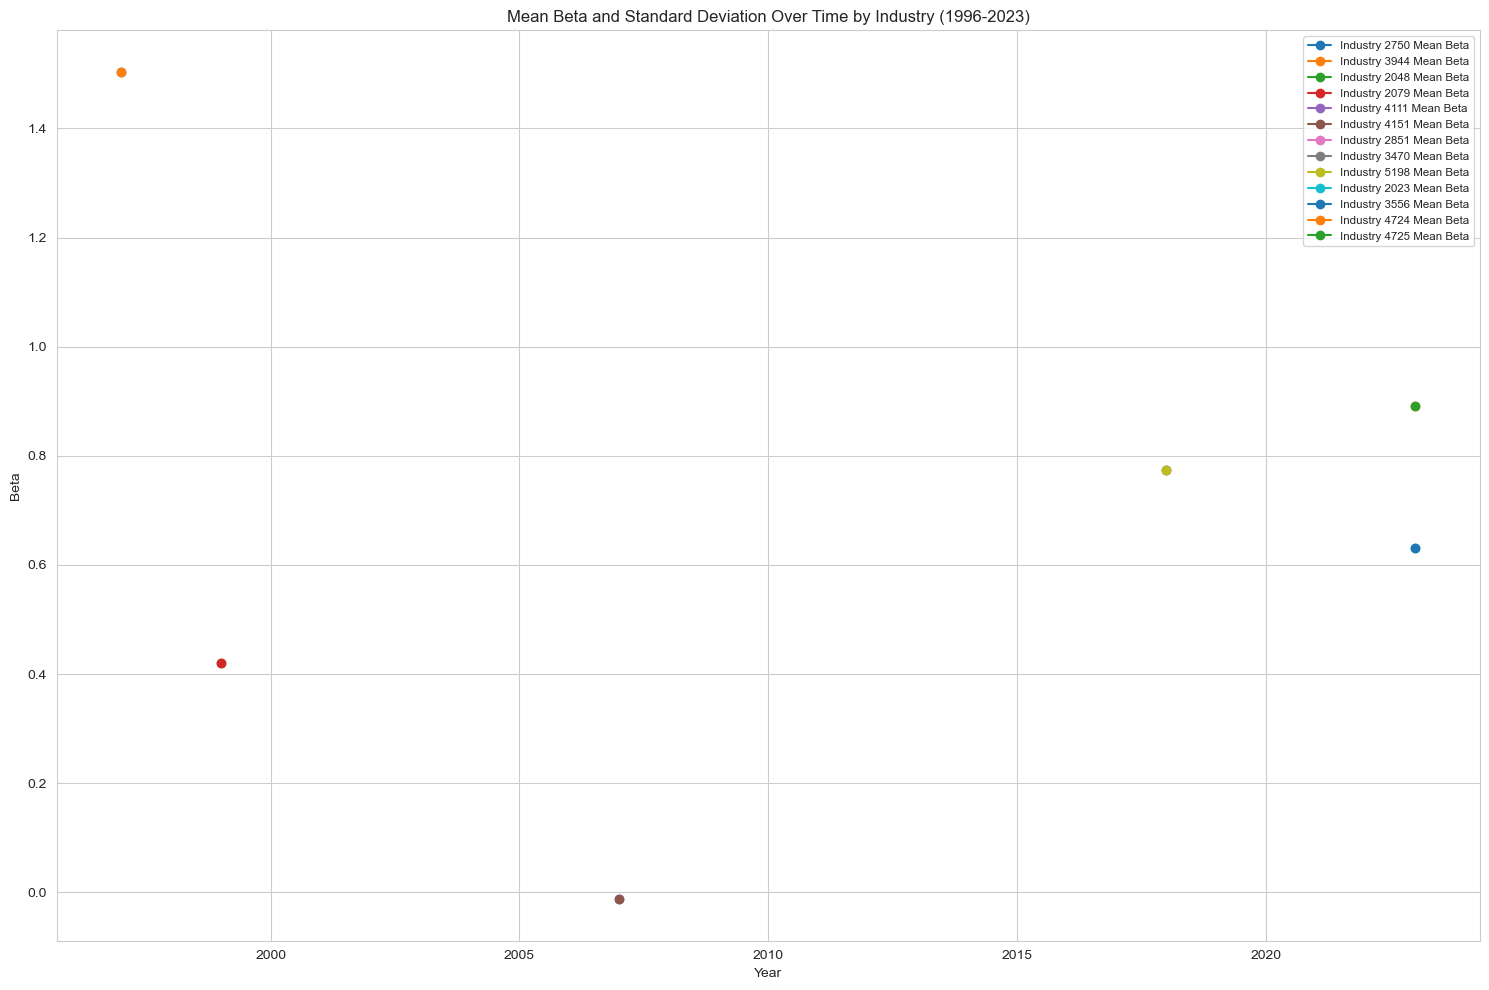

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_industry_stats(industry_stats):
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")

    unique_industries = industry_stats['SICCD'].unique()

    for industry in unique_industries:
        industry_data = industry_stats[industry_stats['SICCD'] == industry]

        plt.plot(industry_data['year'], industry_data['mean'], marker='o', label=f'Industry {industry} Mean Beta')

        plt.fill_between(
            industry_data['year'],
            industry_data['mean'] - industry_data['std_dev'],
            industry_data['mean'] + industry_data['std_dev'],
            alpha=0.2
        )

    plt.title('Mean Beta and Standard Deviation Over Time by Industry (1996-2023)')
    plt.xlabel('Year')
    plt.ylabel('Beta')
    plt.legend(loc='upper right', fontsize='small')
    plt.tight_layout()

    save_path = os.path.join("", f"Mean Beta and Standard Deviation Over Time by Industry (1996-2023).png")
    plt.savefig(save_path)
    plt.show()

plot_industry_stats(industry_stats_yearwise)

In [24]:
def compute_volatilities(data, betas):
    volatilities = []

    for permno in data['PERMNO'].unique():
        firm_data = data[data['PERMNO'] == permno].sort_values('date')
        beta_data = betas[betas['PERMNO'] == permno]

        for year in range(1996, 2024):
            beta_12 = beta_data[(beta_data['year'] == year) & (beta_data['months'] == 12)]
            beta_24 = beta_data[(beta_data['year'] == year) & (beta_data['months'] == 24)]
            beta_36 = beta_data[(beta_data['year'] == year) & (beta_data['months'] == 36)]

            period_data = firm_data[firm_data['year'] == year]

            var_firm = period_data['RET'].var()
            var_market = period_data['vwretd'].var()

            if pd.isna(var_firm):
                var_firm = 0

            if pd.isna(var_market):
                var_market = 0

            for beta_row in [beta_12, beta_24, beta_36]:
                if not beta_row.empty:
                    beta_value = beta_row['beta'].values[0]

                    svol = beta_value * np.sqrt(var_market)
                    ivol = np.sqrt(var_firm) - svol

                    volatilities.append({
                        'PERMNO': permno,
                        'year': year,
                        'months': beta_row['months'].values[0],
                        'total_volatility': np.sqrt(var_firm),
                        'systematic_volatility': svol,
                        'idiosyncratic_volatility': ivol,
                        'beta': beta_value
                    })

    return pd.DataFrame(volatilities)

volatility_data = compute_volatilities(sampled_data, all_betas)

volatility_data

,PERMNO,year,months,total_volatility,systematic_volatility,idiosyncratic_volatility,beta
0,85895,1999,12,0.090759,0.017368,0.073391,0.420920
1,65307,2018,12,0.067303,0.043423,0.023881,0.774588
2,90045,2007,12,0.061204,-0.000317,0.061521,-0.012983
3,22812,2023,12,0.069573,0.029686,0.039887,0.631830
4,17989,1997,12,0.158142,0.062851,0.095291,1.503778
5,20114,2023,12,0.118102,0.043968,0.074135,0.890967


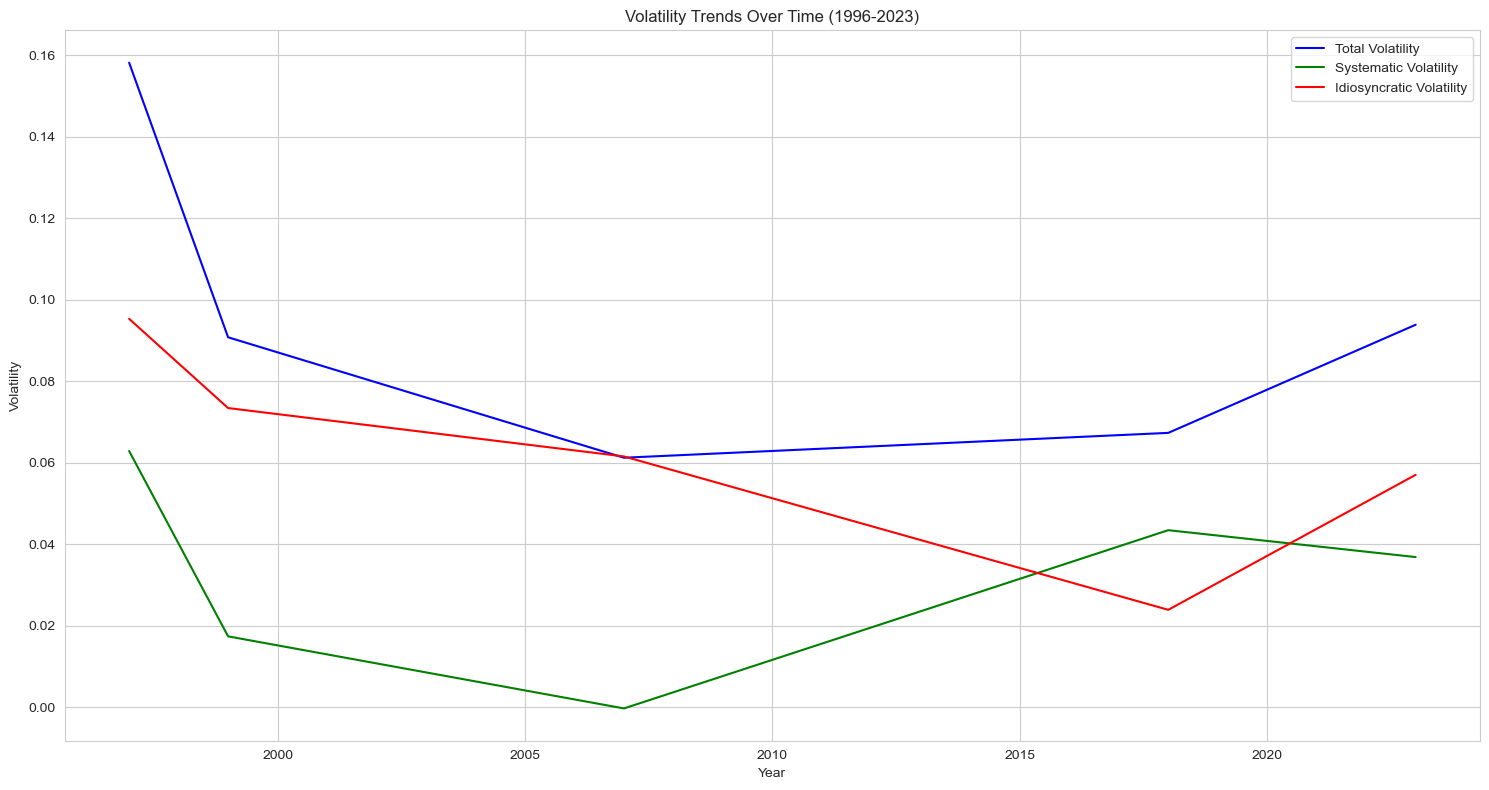

In [25]:
volatility_trends = volatility_data.groupby('year').agg(
    mean_total_volatility=('total_volatility', 'mean'),
    mean_systematic_volatility=('systematic_volatility', 'mean'),
    mean_idiosyncratic_volatility=('idiosyncratic_volatility', 'mean')
).reset_index()

def plot_volatility_trends(volatility_trends):
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")

    plt.plot(volatility_trends['year'], volatility_trends['mean_total_volatility'], label='Total Volatility', color='blue')
    plt.plot(volatility_trends['year'], volatility_trends['mean_systematic_volatility'], label='Systematic Volatility', color='green')
    plt.plot(volatility_trends['year'], volatility_trends['mean_idiosyncratic_volatility'], label='Idiosyncratic Volatility', color='red')

    plt.title('Volatility Trends Over Time (1996-2023)')
    plt.xlabel('Year')
    plt.ylabel('Volatility')
    plt.legend(loc='upper right', fontsize='medium')

    plt.tight_layout()
    save_path = os.path.join("", f"Volatility Trends Over Time (1996-2023).png")
    plt.savefig(save_path)
    plt.show()

plot_volatility_trends(volatility_trends)

In [26]:
import pandas as pd

def create_beta_portfolios(all_betas):
    all_betas['beta_quintile'] = pd.qcut(all_betas['beta'], q=5, labels=False) + 1
    
    beta_portfolios = all_betas.groupby('beta_quintile').agg(
        mean_beta=('beta', 'mean')
    ).reset_index()
    
    return beta_portfolios

def create_volatility_portfolios(volatility_data):
    volatility_data['idiosyncratic_volatility_quintile'] = pd.qcut(volatility_data['idiosyncratic_volatility'], q=5, labels=False) + 1
    
    volatility_portfolios = volatility_data.groupby('idiosyncratic_volatility_quintile').agg(
        mean_beta=('beta', 'mean')
    ).reset_index()
    
    return volatility_portfolios

beta_portfolios = create_beta_portfolios(all_betas)
volatility_portfolios = create_volatility_portfolios(volatility_data)

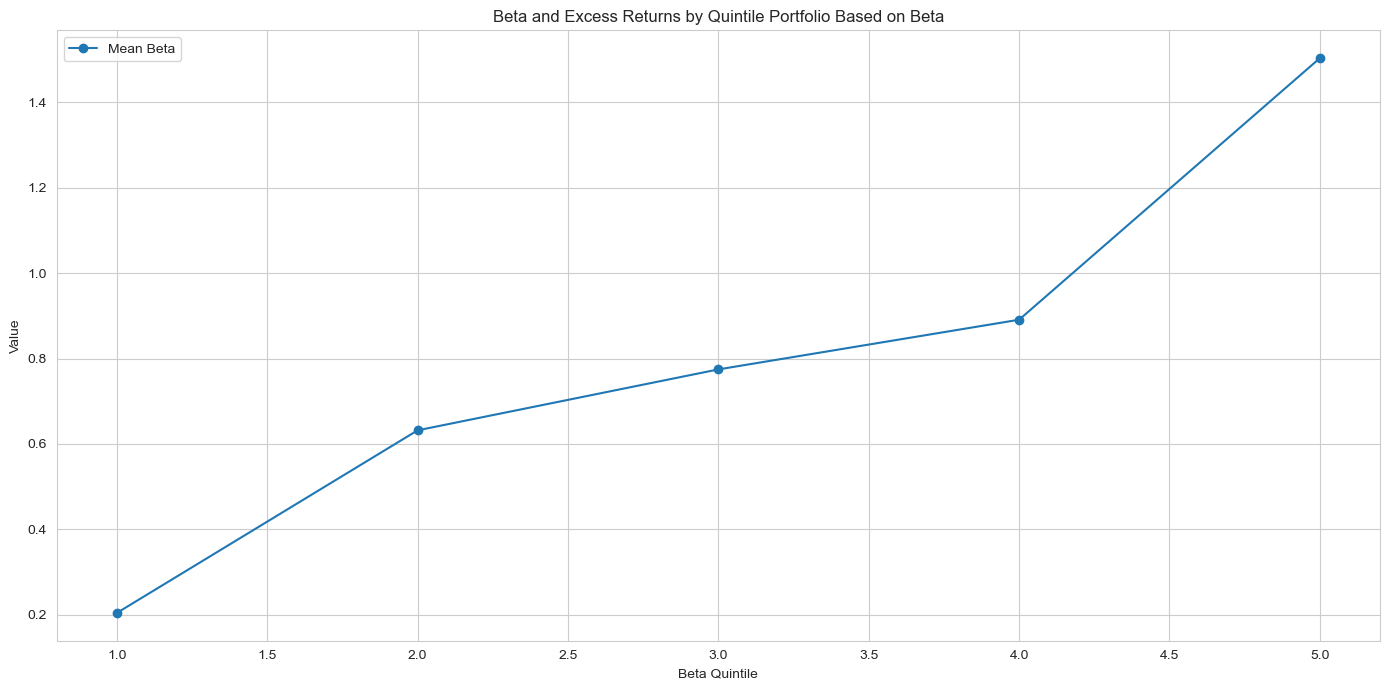

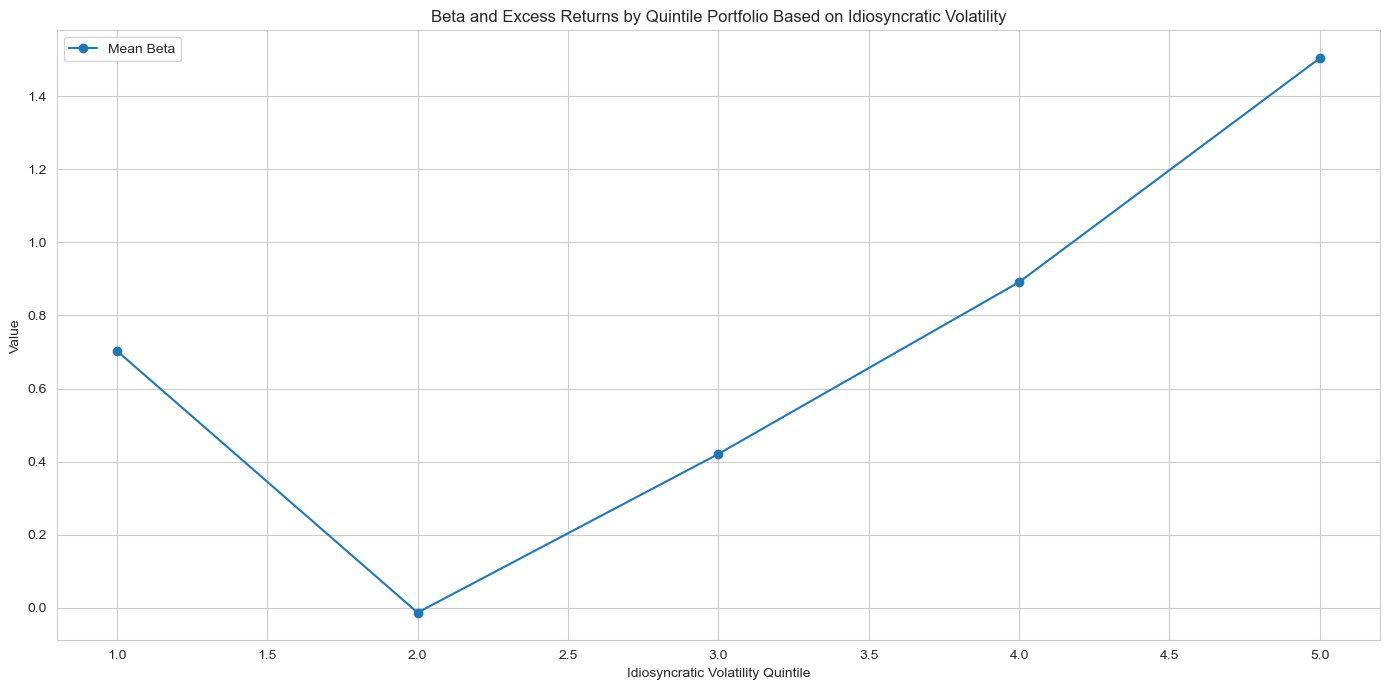

In [27]:
def plot_beta_portfolios(beta_portfolios):
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")
    
    plt.plot(beta_portfolios['beta_quintile'], beta_portfolios['mean_beta'], marker='o', label='Mean Beta')
    
    plt.title('Beta and Excess Returns by Quintile Portfolio Based on Beta')
    plt.xlabel('Beta Quintile')
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    
    save_path = os.path.join("", f"Beta and Excess Returns by Quintile Portfolio Based on Beta.png")
    plt.savefig(save_path)
    plt.show()

def plot_volatility_portfolios(volatility_portfolios):
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")
    
    plt.plot(volatility_portfolios['idiosyncratic_volatility_quintile'], volatility_portfolios['mean_beta'], marker='o', label='Mean Beta')
    
    plt.title('Beta and Excess Returns by Quintile Portfolio Based on Idiosyncratic Volatility')
    plt.xlabel('Idiosyncratic Volatility Quintile')
    plt.ylabel('Value')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    
    save_path = os.path.join("", f"Beta and Excess Returns by Quintile Portfolio Based on Idiosyncratic Volatility.png")
    plt.savefig(save_path)
    plt.show()

plot_beta_portfolios(beta_portfolios)
plot_volatility_portfolios(volatility_portfolios)
